<a href="https://colab.research.google.com/github/ndtuan10/MachineLearning-and-ComputerVision/blob/main/CV/BaiTap/Handcrafted%20feature%20cho%20Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ngô Đức Tuấn**

MSSV: 18520186

##**Bài tập: Handcrafted feature cho Image Classification**

# **Bài tập 1: Color->GrayScale->Histogram**
Phân loại ảnh bằng phương pháp SVM với tập dataset chó, mèo

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Xử lý tập file train

In [ ]:
import os
path = '/content/drive/MyDrive/DogCatSimple/train/' 
def loadImg(path):
    labels_train = sorted([os.path.join(path, file)
                       for file in os.listdir(path)
                       if file.endswith('.jpg')])
    return labels_train

img_path = []
label_path = []

# lấy 3 kí tự đầu làm nhãn
img_train = loadImg(path) #mảng lưu trữ 40 ảnh train
print(img_train)

for k in img_train:
  text = k.split('/')
  lastName = text[-1]
  temp = lastName.split('.')

  label_path.append(temp[0])

for k in label_path:
  print(k)

['/content/drive/MyDrive/DogCatSimple/train/cat.0.jpg', '/content/drive/MyDrive/DogCatSimple/train/cat.1.jpg', '/content/drive/MyDrive/DogCatSimple/train/cat.10.jpg', '/content/drive/MyDrive/DogCatSimple/train/cat.11.jpg', '/content/drive/MyDrive/DogCatSimple/train/cat.12.jpg', '/content/drive/MyDrive/DogCatSimple/train/cat.13.jpg', '/content/drive/MyDrive/DogCatSimple/train/cat.14.jpg', '/content/drive/MyDrive/DogCatSimple/train/cat.15.jpg', '/content/drive/MyDrive/DogCatSimple/train/cat.16.jpg', '/content/drive/MyDrive/DogCatSimple/train/cat.17.jpg', '/content/drive/MyDrive/DogCatSimple/train/cat.18.jpg', '/content/drive/MyDrive/DogCatSimple/train/cat.19.jpg', '/content/drive/MyDrive/DogCatSimple/train/cat.2.jpg', '/content/drive/MyDrive/DogCatSimple/train/cat.3.jpg', '/content/drive/MyDrive/DogCatSimple/train/cat.4.jpg', '/content/drive/MyDrive/DogCatSimple/train/cat.5.jpg', '/content/drive/MyDrive/DogCatSimple/train/cat.6.jpg', '/content/drive/MyDrive/DogCatSimple/train/cat.7.jpg',

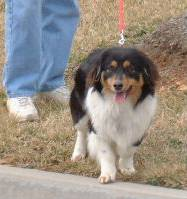

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.imread(img_train[32]))

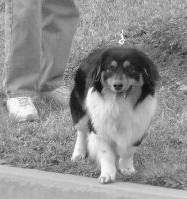

In [ ]:
#Ảnh grayscale
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.imread(img_train[32],0))

##Tính histogram

In [ ]:
import numpy as np
his_train = []

for index, value in enumerate(img_train):
  img = cv2.imread(img_train[index], 0)
  size = img.shape[0] * img.shape[1]
  histogram, bin = np.histogram(img, bins = 256, range=(0,255))
  his_train.append(histogram/size)

print(his_train)

[array([5.34759358e-06, 2.08556150e-04, 1.10695187e-03, 2.31016043e-03,
       1.91978610e-03, 2.10695187e-03, 1.99465241e-03, 2.15508021e-03,
       2.34759358e-03, 2.67379679e-03, 3.45989305e-03, 3.27807487e-03,
       2.71657754e-03, 3.02673797e-03, 3.23529412e-03, 3.49732620e-03,
       3.17647059e-03, 3.12834225e-03, 3.34759358e-03, 3.13903743e-03,
       2.86631016e-03, 2.86096257e-03, 2.81283422e-03, 2.95187166e-03,
       2.76470588e-03, 3.02139037e-03, 2.61497326e-03, 2.31016043e-03,
       2.51336898e-03, 2.24064171e-03, 2.20320856e-03, 1.80748663e-03,
       1.44385027e-03, 1.26737968e-03, 1.20320856e-03, 1.20320856e-03,
       1.06951872e-03, 1.43315508e-03, 1.24064171e-03, 1.41176471e-03,
       1.44919786e-03, 2.37967914e-03, 2.40641711e-03, 3.32085561e-03,
       5.62566845e-03, 6.55080214e-03, 8.78609626e-03, 9.99465241e-03,
       7.27272727e-03, 7.59893048e-03, 6.11764706e-03, 7.58823529e-03,
       8.44385027e-03, 7.51336898e-03, 7.67379679e-03, 6.67914439e-03,
     

##Xử lý tập file test+Tính histogram test



In [ ]:
import os
path = '/content/drive/MyDrive/DogCatSimple/test/'

def loadImages(path):
    labels_test = sorted([os.path.join(path, file)
                          for file in os.listdir(path)
                          if file.endswith('.jpg')])
    return labels_test

img_test = loadImg(path) #mảng lưu trữ 20 ảnh test
label_test_img = ['dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat',  'cat', 'cat', 'dog', 'dog', 'cat',  'cat'] #nhãn 20 ảnh test


his_test = []
for index, value in enumerate(img_test):
  img = cv2.imread(img_test[index], 0)
  size = img.shape[0] * img.shape[1]
  histogram, bin = np.histogram(img, bins = 256, range=(0,255))
  his_test.append(histogram/size)

print(his_test)

[array([4.73387720e-05, 5.25986356e-05, 1.78835361e-04, 2.78772769e-04,
       4.99687038e-04, 7.88979534e-04, 1.02041353e-03, 1.35178493e-03,
       1.57795907e-03, 1.81465293e-03, 2.03556720e-03, 2.47739574e-03,
       2.52999437e-03, 2.99812223e-03, 2.95078346e-03, 2.91396441e-03,
       2.70882973e-03, 2.78772769e-03, 2.91396441e-03, 2.71934946e-03,
       3.06124059e-03, 2.95604332e-03, 2.88240523e-03, 3.28741472e-03,
       3.14013854e-03, 3.35579295e-03, 3.53988818e-03, 3.99223644e-03,
       4.40250580e-03, 4.73387720e-03, 4.68653843e-03, 5.32298192e-03,
       4.89693297e-03, 5.34402138e-03, 5.73325128e-03, 5.52811660e-03,
       5.98572473e-03, 6.13826077e-03, 5.87000773e-03, 6.24871791e-03,
       6.57482945e-03, 6.22241859e-03, 6.75892467e-03, 6.30131654e-03,
       6.42229341e-03, 6.56430972e-03, 6.33813559e-03, 6.55378999e-03,
       6.84308249e-03, 6.63794781e-03, 6.51171109e-03, 6.93776003e-03,
       7.03243758e-03, 7.03769744e-03, 7.64784161e-03, 6.92724031e-03,
     

##Huấn luyện mô hình

### **Mục tiêu:**
- *Dùng các độ đo như Accuracy, Precison, Recall, F1 để đánh giá kết quả mô hình*

**Quy ước 1 số độ đo**
- Precision (tỷ lệ các điểm thực sự = 1 trong số những điểm được dự đoán = 1) 
- Recall (Tỷ lệ những điểm = 1 trong những điểm thực sự = 1)

###SVM

In [ ]:
import time
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
start = time.time()
model = SVC(kernel='linear')
model.fit(his_train,label_path)
label_pred = model.predict(his_test)
stop = time.time()
LinearSVC_time = {stop - start}
print(f"Training time: {LinearSVC_time}s")

Training time: {0.003936052322387695}s


In [ ]:
accuracy_score_SVM_hist = accuracy_score(label_test_img, label_pred)
precision_score_SVM_hist = precision_score(label_test_img, label_pred, pos_label='dog')
recall_score_SVM_hist = recall_score(label_test_img, label_pred, pos_label='dog')

print(f'Do chinh xac (Accuracy) LinearSVC: {np.multiply(metrics.accuracy_score(label_test_img, label_pred),100)} %')
print(f"Do chinh xac (Precision) LinearSVC: {np.multiply(round(metrics.precision_score(label_test_img, label_pred, pos_label='dog'), 4),100)} %")
print(f"Recall LinearSVC: {np.multiply(round(metrics.recall_score(label_test_img, label_pred, pos_label='dog'), 4),100)} %")
print(f"f1_score LinearSVC: {np.multiply(round(metrics.f1_score(label_test_img, label_pred, pos_label='dog'), 4),100)} %")

Do chinh xac (Accuracy) LinearSVC: 35.0 %
Do chinh xac (Precision) LinearSVC: 33.33 %
Recall LinearSVC: 85.71 %
f1_score LinearSVC: 48.0 %


#**Bài tập 2: Local feature: SIFT + Bag of Visual Words (BOVW)**
Tính SIFT, Tạo Từ điển và tính feature vector

## Xây dựng visual dictionary. Tính descriptor (SIFT)

Sử dụng SIFT để detecting features và extracting descriptor trong ảnh

In [ ]:
!pip install opencv-contrib-python==3.4.2.17

In [ ]:
extractor = cv2.xfeatures2d.SIFT_create()

def features(path):
  image = cv2.imread(path)
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  (keypoints, descriptors) = extractor.detectAndCompute(image, None)
  return keypoints, descriptors

In [ ]:
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0/len(descriptor_list)
    return histogram

## Tạo Vocabulary
Tiếp theo, tạo các cụm (`clusters`) từ các descriptors bằng thuật toán 
K-Means. Trung tâm của mỗi cụm sẽ được sử dụng làm từ vựng (`vocab`) của từ điển trực quan (`visual dictionary`).

Đối với mỗi hình ảnh, tạo histogram thể hiện tần số các từ vựng và tần suất của các từ vựng trong hình ảnh. Những biểu đồ đó gọi là Bag of Visual Word (BOVW).

In [ ]:
# tạo Vocabulary
from sklearn.cluster import KMeans
preprocessed_image = []

images = img_train + img_test
label_imges = label_path + label_test_img

for image in images:
    keypoints, descriptors = features(image)
    start = time.time()
    # K-Means
    kmeans = KMeans(n_clusters = 60)
    kmeans.fit(descriptors)
    stop = time.time()
    kmeans_time = {stop - start}
    print(f"Training time: {kmeans_time}s") 
    if descriptors is not None:
        hist = build_histogram(descriptors, kmeans)
        preprocessed_image.append(hist)

Training time: {0.47127366065979004}s
Training time: {1.0651605129241943}s
Training time: {2.0620014667510986}s
Training time: {1.1589951515197754}s
Training time: {1.2112014293670654}s
Training time: {0.40995168685913086}s
Training time: {0.7537503242492676}s
Training time: {1.4015765190124512}s
Training time: {1.115185022354126}s
Training time: {3.378488302230835}s
Training time: {1.048731803894043}s
Training time: {1.1684629917144775}s
Training time: {1.326791524887085}s
Training time: {1.3151512145996094}s
Training time: {1.0006964206695557}s
Training time: {0.5714676380157471}s
Training time: {1.887761116027832}s
Training time: {2.4110336303710938}s
Training time: {1.116955280303955}s
Training time: {0.6872785091400146}s
Training time: {1.895477533340454}s
Training time: {1.7695705890655518}s
Training time: {0.8568506240844727}s
Training time: {0.5229470729827881}s
Training time: {0.498119592666626}s
Training time: {1.1218721866607666}s
Training time: {1.015871286392212}s
Training

### Co giãn dữ liệu (Scaling data)

- *Chính quy hóa (standardisation)*

Co giãn dữ liệu là một phương pháp chuẩn hóa phạm vi của các đặc trưng dữ liệu và được thực hiện trong suốt quá trình tiền xử lí dữ liệu. Có các cách để co giãn dữ liệu như chuẩn hóa min-max, co giãn trung bình,...Chúng tôi sử dụng sử chính quy hóa (standardisation).

Việc chính quy hóa dữ liệu giúp cho giá trị của mỗi đặc trưng có trung bình bằng 0 và phương sai bằng 1. Phương pháp này được sử dụng rộng rãi trong việc chuẩn hóa dữ liệu của nhiều thuật toán học máy (SVM, logistic regression và ANNs).

Để tính toán chính quy hóa dữ liệu, ta phải xác định trung bình và độ lệch chuẩn cho phân phối của mỗi đặc trưng. Tiếp theo ta lấy mỗi giá trị của đặc trưng trừ đi giá trị trung bình rồi chia cho độ lệch chuẩn của đặc trưng đó như công thức dưới đây:

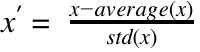

Trong đó *x* là véc-tơ đặc trưng ban đầu, *average(x)* là trung bình của véc-tơ đặc trưng đó và *std(x)* là độ lệch chuẩn của nó.

In [ ]:
# Standardization
print('Standardization')
from sklearn.preprocessing import StandardScaler

preprocessed_image = StandardScaler().fit_transform(preprocessed_image)

preprocessed_image[:1]

Standardization


array([[-0.41327647,  1.78208609,  0.19632315,  2.65105146, -0.68093118,
        -0.69515132,  2.26899175, -0.82820749,  0.73176664, -0.7625277 ,
        -0.82474263,  1.48309298,  0.34184769, -0.58249462,  2.28376985,
        -0.69556801, -0.78334967,  2.37286328,  2.01576802, -0.74777429,
        -0.72105295, -0.80570927,  3.43122149, -0.70034278, -0.62347483,
        -0.77447716,  0.43627804, -0.61014259, -0.72808448, -0.60852232,
        -0.62400438, -0.56638755, -0.88160195, -0.50190089, -0.51916715,
        -0.54812621, -0.57917286,  1.05278009, -0.5307752 , -0.76742875,
        -0.43313914, -0.65291879, -0.60802096, -0.50391032, -0.56785571,
        -0.45072589, -0.47842444, -0.37426277,  1.16559566, -0.44232226,
        -0.43826844, -0.51664463, -0.38578076, -0.32187184, -0.34281664,
        -0.28065787, -0.3559273 , -0.36554215, -0.08388727, -0.45708803]])

## Tính feature vector

In [ ]:
train_feature_vector = []

for image in img_train:
    keypoints, descriptors = features(image)
    kmeans.fit(descriptors)
    if descriptors is not None:
        hist = build_histogram(descriptors, kmeans)
        train_feature_vector.append(hist)

train_feature_vector = StandardScaler().fit_transform(train_feature_vector)

train_feature_vector[:1]

array([[-0.42521223,  1.60634083,  0.05706724,  0.46736629, -0.72861222,
         2.12875528, -0.9339078 ,  0.61713232,  0.35059187,  0.05286107,
        -0.86537944,  2.19529146,  4.01752411, -0.96651293, -1.11793429,
        -0.669577  ,  0.37460818, -0.71046345,  2.41086655, -0.68037442,
        -0.84651254, -0.80391099, -0.82324836, -0.65482533,  1.66455528,
        -0.67919768,  1.05416753, -0.67073284, -0.83117863, -0.58085673,
         1.26256311, -0.6409849 , -0.71221041, -0.70661442,  1.31007131,
        -0.75217248, -0.56794188, -0.81376041, -0.63433094, -0.59902462,
         0.82452861, -0.82635921, -0.80074678, -0.4161771 , -0.63025697,
        -0.22745739, -0.4966002 , -0.61769796,  1.22182928, -0.44311205,
        -0.39578534, -0.45679105, -0.49256002, -0.49128204, -0.4232546 ,
        -0.40940245, -0.33420892, -0.39243215, -0.4441316 , -0.41925899]])

In [ ]:
test_feature_vector = []

for image in img_test:
    keypoints, descriptors = features(image)
    KMeans(n_clusters = 60).fit(descriptors)
    if descriptors is not None:
        hist = build_histogram(descriptors, kmeans)
        test_feature_vector.append(hist)

test_feature_vector = StandardScaler().fit_transform(test_feature_vector)

test_feature_vector[:1]

array([[ 0.66077558,  0.5585563 ,  0.27880253,  0.61045928,  1.69314912,
        -0.17229535, -0.9849639 ,  1.12445311,  0.66341683, -0.63725052,
        -1.08457397,  0.83668886, -0.13295464, -0.49281184, -0.0518768 ,
        -0.48225963, -0.17916008,  0.52795152,  1.7812392 , -0.35912557,
        -1.17658449,  0.04615284, -0.78233487,  1.09420249,  0.61490106,
         0.07278095,  0.07030395, -0.04957335, -0.24684089,  0.47991297,
        -0.21658764,  0.08332651, -0.91181323,  0.72861119, -0.80981366,
        -0.62999448, -0.23124213, -0.13534744, -0.62724914,  0.84882163,
        -0.46747524, -0.54311116,  2.712599  ,  0.30146165,  0.28717258,
        -0.12485326,  0.69904696, -0.0128723 , -0.60857936,  0.44793394,
         1.30037247,  0.35283323, -0.83801919, -0.22060401,  0.71928763,
        -0.22097776,  0.25715291, -0.06719208,  0.19083022,  0.75769282]])

## Áp dụng SVM

In [ ]:
# Huấn luyện SVM
start = time.time()
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(train_feature_vector,label_path)
label_pred_des = model.predict(test_feature_vector)
stop = time.time()
LinearSVC_BOVW_time = {stop - start}
print(f"Training time: {LinearSVC_BOVW_time}s")

Training time: {0.0067789554595947266}s


In [ ]:
accuracy_score_SVM_visword = accuracy_score(label_test_img, label_pred_des)
precision_score_SVM_visword = precision_score(label_test_img, label_pred_des, pos_label='dog')
recall_score_SVM_visword = recall_score(label_test_img, label_pred_des, pos_label='dog')

print(f'Do chinh xac (Accuracy) SVM_Visual_Word: {np.multiply(round(metrics.accuracy_score(label_test_img, label_pred_des),4),100)} %')
print(f"Do chinh xac (Precision) SVM_Visual_Word: {np.multiply(round(metrics.precision_score(label_test_img, label_pred_des, pos_label='dog'), 4),100)} %")
print(f"Recall SVM_Visual_Word: {np.multiply(round(metrics.recall_score(label_test_img, label_pred_des, pos_label='dog'), 4),100)} %")
print(f"f1_score SVM_Visual_Word: {np.multiply(round(metrics.f1_score(label_test_img, label_pred_des, pos_label='dog'), 4),100)} %")

Do chinh xac (Accuracy) SVM_Visual_Word: 45.0 %
Do chinh xac (Precision) SVM_Visual_Word: 30.0 %
Recall SVM_Visual_Word: 42.86 %
f1_score SVM_Visual_Word: 35.29 %


#**Bài tập 3: Local feature: HOG**

## Tính toán gradient

In [ ]:
images = img_train + img_test
label_imges = label_path + label_test_img

img = cv2.imread(images[index], 0)
print('Kích thước ảnh gốc: ', img.shape)
# 1. Khai báo các tham số
cell_size = (8, 8)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 9  # number of orientation bins

# 2. Tính toán các tham số truyền vào HOGDescriptor
# winSize: Kích thước của bức ảnh được crop để chia hết cho cell size.
winSize = (img.shape[1] // cell_size[1] * cell_size[1], img.shape[0] // cell_size[0] * cell_size[0])
# blockSize: Kích thước của 1 block
blockSize = (block_size[1] * cell_size[1], block_size[0] * cell_size[0])
# blockStride: Số bước di chuyển của block khi thực hiện chuẩn hóa histogram bước 3
blockStride = (cell_size[1], cell_size[0])
print('Kích thước bức ảnh crop theo winSize (pixel): ', winSize)
print('Kích thước của 1 block (pixel): ', blockSize)
print('Kích thước của block stride (pixel): ', blockStride)

Kích thước ảnh gốc:  (425, 320)
Kích thước bức ảnh crop theo winSize (pixel):  (320, 424)
Kích thước của 1 block (pixel):  (16, 16)
Kích thước của block stride (pixel):  (8, 8)


In [ ]:
# 3. Tính toán HOG descriptor
hog = cv2.HOGDescriptor(_winSize=winSize,
                        _blockSize=blockSize,
                        _blockStride=blockStride,
                        _cellSize=cell_size,
                        _nbins=nbins)

# Kích thước của lưới ô vuông.
n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
print('Kích thước lưới ô vuông (ô vuông): ', n_cells)

# Reshape hog feature
hog_feats = hog.compute(img)\
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  

print('Kích thước hog feature (h, w, block_size_h, block_size_w, nbins): ', hog_feats.shape)
hog_feats = hog_feats.reshape(hog_feats.shape[0],-3)
print('Kích thước hog feature đã được reshape: ', hog_feats.shape)

Kích thước lưới ô vuông (ô vuông):  (53, 40)
Kích thước hog feature (h, w, block_size_h, block_size_w, nbins):  (52, 39, 2, 2, 9)
Kích thước hog feature đã được reshape:  (52, 1404)


In [ ]:
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0/len(descriptor_list)
    return histogram

## Tạo Vocabulary

In [ ]:
from sklearn.cluster import KMeans
preprocessed_image_2 = []

images = img_train + img_test
label_imges = label_path + label_test_img

for image in images:
    #keypoints, descriptors = features(image)
    start = time.time()
    # K-Means
    kmeans = KMeans(n_clusters = 50)
    kmeans.fit(hog_feats)
    stop = time.time()
    kmeans_time = {stop - start}
    print(f"Training time: {kmeans_time}s") 
    if descriptors is not None:
        hist = build_histogram(hog_feats, kmeans)
        preprocessed_image_2.append(hist)

Training time: {0.6967763900756836}s
Training time: {0.7147579193115234}s
Training time: {0.7884700298309326}s
Training time: {0.7244510650634766}s
Training time: {0.736151933670044}s
Training time: {0.6878330707550049}s
Training time: {0.6940515041351318}s
Training time: {0.7466604709625244}s
Training time: {0.7178106307983398}s
Training time: {0.7302355766296387}s
Training time: {0.7453317642211914}s
Training time: {0.7068769931793213}s
Training time: {0.6806421279907227}s
Training time: {0.6935820579528809}s
Training time: {0.7350428104400635}s
Training time: {0.7139506340026855}s
Training time: {0.7103004455566406}s
Training time: {0.7152349948883057}s
Training time: {0.7024664878845215}s
Training time: {0.6848430633544922}s
Training time: {0.7027664184570312}s
Training time: {0.69191575050354}s
Training time: {0.6668899059295654}s
Training time: {0.6940169334411621}s
Training time: {0.71883225440979}s
Training time: {0.6947314739227295}s
Training time: {0.69268798828125}s
Training

### Co giãn dữ liệu

In [ ]:
# Standardization
print('Standardization')
from sklearn.preprocessing import StandardScaler

preprocessed_image_2 = StandardScaler().fit_transform(preprocessed_image_2)

preprocessed_image_2[:1]

Standardization


array([[-0.33333333, -0.52592371, -0.47380354, -0.33333333, -0.33333333,
        -0.33333333, -0.36342189,  3.74165739, -0.22941573, -0.22941573,
        -0.26726124, -0.39223227, -0.18569534, -0.26726124, -0.30151134,
        -0.18569534, -0.33333333, -0.26726124, -0.22941573, -0.13018891,
        -0.13018891, -0.22941573, -1.        , -0.13018891, -0.13018891,
        -1.        , -1.        , -1.        , -0.13018891, -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -0.13018891, -0.13018891, -0.18569534,  7.68114575, -1.        ,
        -0.22941573, -1.        , -0.13018891, -1.        , -1.        ]])

## Tính feature vector

In [ ]:
train_feature_vector_2 = []

for image in img_train:
    kmeans.fit(hog_feats)
    if descriptors is not None:
        hist = build_histogram(hog_feats, kmeans)
        train_feature_vector_2.append(hist)

train_feature_vector_2 = StandardScaler().fit_transform(train_feature_vector_2)

train_feature_vector_2[:1]

array([[ 3.        , -0.42008403,  1.44115338, -0.33333333, -0.42008403,
        -0.16012815, -0.33333333, -0.2847474 , -0.22941573, -0.16012815,
        -0.2847474 , -0.16012815, -0.33333333, -0.22941573, -0.16012815,
        -0.22941573, -1.        , -0.16012815, -0.22941573, -1.        ,
        -0.16012815, -0.16012815, -0.16012815, -0.22941573, -0.16012815,
        -0.33333333, -0.16012815, -0.16012815, -0.16012815, -1.        ,
        -1.        , -1.        , -1.        , -0.16012815, -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -0.16012815, -1.        , -1.        , -0.16012815, -0.16012815,
        -0.22941573, -1.        , -0.16012815, -1.        , -1.        ]])

In [ ]:
test_feature_vector_2 = []

for image in img_test:
    KMeans(n_clusters = 50).fit(hog_feats)
    if hog_feats is not None:
        hist = build_histogram(hog_feats, kmeans)
        test_feature_vector_2.append(hist)

test_feature_vector_2 = StandardScaler().fit_transform(test_feature_vector_2)

test_feature_vector_2[:1]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]])

## Áp dụng SVM

In [ ]:
# Huấn luyện SVM
start = time.time()
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(train_feature_vector_2,label_path)
label_pred_des_2 = model.predict(test_feature_vector_2)
stop = time.time()
LinearSVC_HOG_time = {stop - start}
print(f"Training time: {LinearSVC_HOG_time}s")

Training time: {0.011437654495239258}s


In [ ]:
accuracy_score_SVM_HOG = accuracy_score(label_test_img, label_pred_des_2)

print(f'Do chinh xac (Accuracy) SVM_HOG: {np.multiply(round(metrics.accuracy_score(label_test_img, label_pred_des_2),4),100)} %')

Do chinh xac (Accuracy) SVM_HOG: 65.0 %


####Model Report

In [ ]:
print('Các độ đo thông số của các mô hình:')
print('SVM_hist: \n','accuracy:', accuracy_score_SVM_hist, '\n precision:', precision_score_SVM_hist, '\n recall: ',recall_score_SVM_hist)
print('======================================================')
print('SVM_Visual_Word : \n', 'accuracy:', accuracy_score_SVM_visword, '\n precision:', precision_score_SVM_visword,'\n recall:',recall_score_SVM_visword)
print('======================================================')
print('SVM_HOG : \n','accuracy:', accuracy_score_SVM_HOG)
print('======================================================')

Các độ đo thông số của các mô hình:
SVM_hist: 
 accuracy: 0.35 
 precision: 0.3333333333333333 
 recall:  0.8571428571428571
SVM_Visual_Word : 
 accuracy: 0.45 
 precision: 0.3 
 recall: 0.42857142857142855
SVM_HOG : 
 accuracy: 0.65


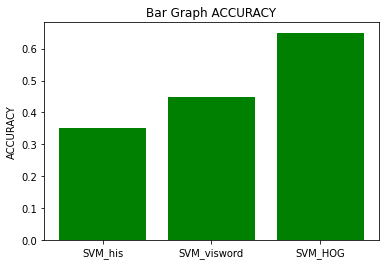

In [ ]:
#in biểu đồ
import matplotlib
import matplotlib.pyplot as plt
BarGraph=['SVM_his','SVM_visword','SVM_HOG']
accuracy=[accuracy_score_SVM_hist,accuracy_score_SVM_visword,accuracy_score_SVM_HOG]
plt.bar(BarGraph,accuracy,color='green')
plt.title('Bar Graph ACCURACY')
plt.xlabel('')
plt.ylabel('ACCURACY')
plt.show()

In [ ]:
print('Thời gian huấn luyện các mô hình:')
print('SVM_hist: \n','time:', LinearSVC_time)
print('======================================================')
print('SVM_Visual_Word : \n','time:',LinearSVC_BOVW_time)
print('======================================================')
print('SVM_Visual_Word : \n','time:',LinearSVC_HOG_time)
print('======================================================')

Thời gian huấn luyện các mô hình:
SVM_hist: 
 time: {0.003936052322387695}
SVM_Visual_Word : 
 time: {0.0067789554595947266}
SVM_Visual_Word : 
 time: {0.011437654495239258}
